In [2]:
# 데이터가 필요해요!
# 결정경계도 그래프로 한번 그려볼꺼예요!

# 데이터는 mglearn이라는 패키지에서 가져올꺼예요!
# 결정경계 그래프는 mlxtend라는 패키지를 이용해서 그릴꺼예요!

In [3]:
import numpy as np
from sklearn.svm import SVC, SVR  # 분류작업과 Regression작업에 사용하는
                                  # 구현체가 따로 존재
                                  # 우리는 SVC를 이용해서 분류모델 사용
import mglearn   # 여기에서 데이터셋을 가져올 꺼예요!
import matplotlib.pyplot as plt   # 그래프 그리는 기본 모듈
from mlxtend.plotting import plot_decision_regions # 결정경계를 그리는 함수
# 이 함수는 2차원 평면에 그림을 그리기 때문에 독립변수가 2개인 경우만
# 그림을 그릴 수 있어요!

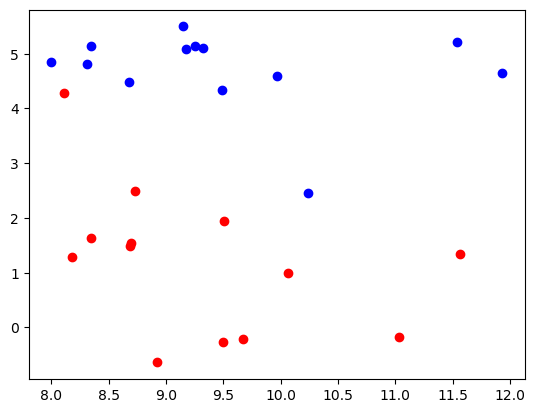

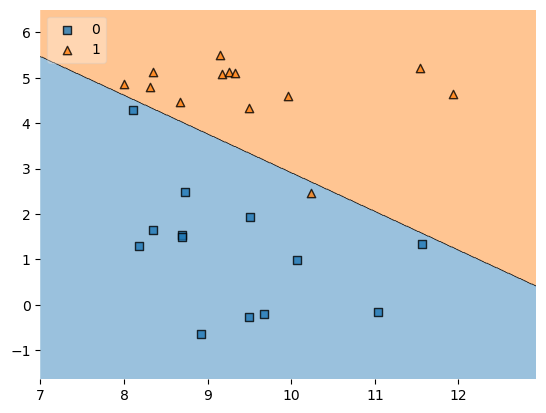

In [4]:
# 데이터 로딩
x_data, y_data = mglearn.datasets.make_forge()
y_data

# 종속변수가 0인 데이터(독립변수)는 빨간색점으로 표현
# 종속변수가 1인 데이터(독립변수)는 파란색점으로 표현

x_data_red = x_data[y_data==0]
x_data_blue = x_data[y_data==1]

# 종속변수가 0인 데이터를 빨간색점으로 표현
plt.scatter(x_data_red[:,0],
            x_data_red[:,1],
            color='r')
plt.scatter(x_data_blue[:,0],
            x_data_blue[:,1],
            color='b')
plt.show()

svm_model = SVC(C=1000,
                kernel='linear')

# 전체데이터를 이용해서 학습을 진행
# 최적화 알고리즘을 이용해서 support vector를 찾아요
svm_model.fit(x_data,
              y_data)

# 그럼 찾은 support vector도 알 수 있나요?
# svm_model.support_vectors_

# 그래서 결정경계는 어떻게 되나요?
plot_decision_regions(X=x_data,
                      y=y_data,
                      clf=svm_model,
                      legend=2) # legend : 범주
plt.show()


In [5]:
# 자 그럼 이제..
# 이진분류가 아닌 다중분류로
# Iris 데이터를 이용해서 SVC를 구현하고
# 역시 그래프로 결정경계를 표현해보아요!
# Iris의 독립변수는 꽃잎의 길이,너비
# 꽃받침의 길이, 너비인데
# 이 중 꽃잎과 꽃받침의 길이를 이용해서 학습

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions



              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      1.00      0.94        15
   Virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



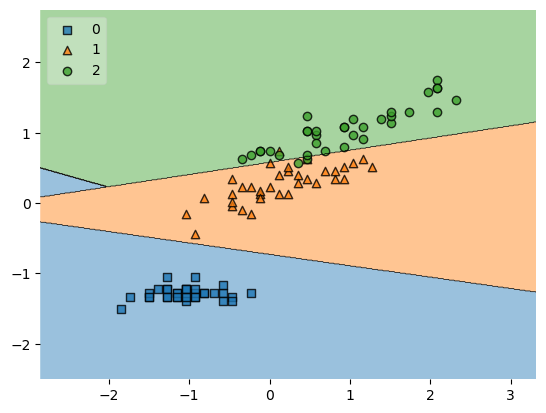

In [6]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width',
              'petal_length', 'petal_width']
df['target'] = iris.target

# 전처리
# 1. 결측치 없구요!
# 2. 이상치도 처리하지 않아요!
# 3. 중복데이터 처리
df = df.drop_duplicates()
# 4. 데이터 불균형 없어요!
# 5. 데이터 분할
x_data = df[['sepal_length', 'petal_length']].values
y_data = df['target'].values  # SVC 이용할거기 때문에
                              # 1차원으로 사용
x_data_train, x_data_test, y_data_train, y_data_test = \
train_test_split(x_data,
                 y_data,
                 test_size=0.3,
                 stratify=y_data,
                 random_state=42)
# 6. 정규화
scaler_x = StandardScaler()
scaler_x.fit(x_data_train)

x_data_train_norm = scaler_x.transform(x_data_train)
x_data_test_norm = scaler_x.transform(x_data_test)

# 모델 생성
svm_iris_model = SVC(kernel='linear',
                     C=1)
# 이 모델이 좋은모델인지 hyperparameter를 변경해가면서
# 확인해야 해요!

# 모델 학습
svm_iris_model.fit(x_data_train_norm,
                   y_data_train)

# 예측
svm_y_pred = svm_iris_model.predict(x_data_test_norm)
svm_y_pred

target_names= ['Setosa', 'Versicolor', 'Virginica']

# evaluation
# Logistic Regression보다 더 좋은 성능을 발휘해요!
print(classification_report(y_data_test,
                            svm_y_pred,
                            target_names=target_names))

plot_decision_regions(X=x_data_train_norm,
                      y=y_data_train,
                      clf=svm_iris_model,
                      legend=2)
plt.show()


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      1.00      0.94        15
   Virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



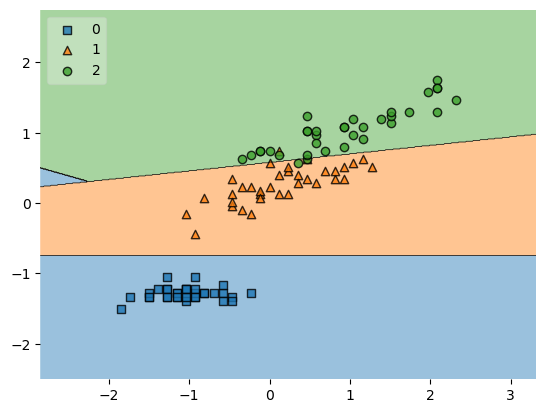

In [8]:
# 독립변수를 4개 모두 사용할 경우

iris = datasets.load_iris()

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width',
              'petal_length', 'petal_width']
df['target'] = iris.target

# 전처리
# 1. 결측치 없구요!
# 2. 이상치도 처리하지 않아요!
# 3. 중복데이터 처리
df = df.drop_duplicates()
# 4. 데이터 불균형 없어요!
# 5. 데이터 분할
x_data = df[['sepal_length', 'petal_length']].values
y_data = df['target'].values  # SVC 이용할거기 때문에
                              # 1차원으로 사용
x_data_train, x_data_test, y_data_train, y_data_test = \
train_test_split(x_data,
                 y_data,
                 test_size=0.3,
                 stratify=y_data,
                 random_state=42)
# 6. 정규화
scaler_x = StandardScaler()
scaler_x.fit(x_data_train)

x_data_train_norm = scaler_x.transform(x_data_train)
x_data_test_norm = scaler_x.transform(x_data_test)

# 모델 생성
svm_iris_model = SVC(kernel='linear',
                     C=100)
# 이 모델이 좋은모델인지 hyperparameter를 변경해가면서
# 확인해야 해요!

# 모델 학습
svm_iris_model.fit(x_data_train_norm,
                   y_data_train)

# 예측
svm_y_pred = svm_iris_model.predict(x_data_test_norm)
svm_y_pred

target_names= ['Setosa', 'Versicolor', 'Virginica']

# evaluation
# Logistic Regression보다 더 좋은 성능을 발휘해요!
print(classification_report(y_data_test,
                            svm_y_pred,
                            target_names=target_names))

plot_decision_regions(X=x_data_train_norm,
                      y=y_data_train,
                      clf=svm_iris_model,
                      legend=2)
plt.show()
